# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [83]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 999

In [84]:
plant = pd.read_csv("data/31.finaldata_plant/plant_wsASOS.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778,4.00,3.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490,5.00,3.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.778235,4.55,-0.66,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,2.3,0.0,283.6,2.1,1020.9,1024.2,60.2,22.3,36600.0
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.490602,3.79,-1.31,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,2.3,0.0,283.6,2.1,1020.9,1024.2,60.2,22.3,36600.0
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.940403,4.15,-0.03,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,1.9,0.0,326.5,2.1,1020.9,1024.2,62.5,22.3,36600.0
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.232477,4.21,-0.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,1.9,0.0,326.5,2.1,1020.9,1024.2,62.5,22.3,36600.0


## 정규화 할 list 나누기

In [85]:
dummy_list = []
caling_list= ["AVG_PA", "AVG_PS", "HR1_RN", "AVG_TA", "AVG_WS", "MAX_WS", "MAX_WS_WD", "MAX_INS_WS", "MAX_INS_WS_WD", "WD_N1", "WS_N1", "GUST_WS_N1", "PA", "BUOY_HM", "BUOY_TA", "MAX_WH", "AVG_WH", "LB_WD", "LB_WS", "LB_MAX_INS_WD", "LB_MAX_IWS", "LB_TA", "LB_PS", "LB_HM"]

In [86]:
caling_list.extend(["DEW_POINT_COIL", "IN_OUT_TEM_D", "IN_COIL_TEM_D", "ASOS_RAIN_CUM", "ASOS_TEMP", "ASOS_WIND_DIR", "ASOS_WIND_SPD", "ASOS_PRESS", "ASOS_SEA_PRESS", "ASOS_HUMID", "ASOS_SOLAR_RAD", "ASOS_SUNSHINE"])
caling_list

['AVG_PA',
 'AVG_PS',
 'HR1_RN',
 'AVG_TA',
 'AVG_WS',
 'MAX_WS',
 'MAX_WS_WD',
 'MAX_INS_WS',
 'MAX_INS_WS_WD',
 'WD_N1',
 'WS_N1',
 'GUST_WS_N1',
 'PA',
 'BUOY_HM',
 'BUOY_TA',
 'MAX_WH',
 'AVG_WH',
 'LB_WD',
 'LB_WS',
 'LB_MAX_INS_WD',
 'LB_MAX_IWS',
 'LB_TA',
 'LB_PS',
 'LB_HM',
 'DEW_POINT_COIL',
 'IN_OUT_TEM_D',
 'IN_COIL_TEM_D',
 'ASOS_RAIN_CUM',
 'ASOS_TEMP',
 'ASOS_WIND_DIR',
 'ASOS_WIND_SPD',
 'ASOS_PRESS',
 'ASOS_SEA_PRESS',
 'ASOS_HUMID',
 'ASOS_SOLAR_RAD',
 'ASOS_SUNSHINE']

In [87]:
plant = etl.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE']
dummy_category: ['PLANT', 'LOC']


,MEA_DDHR,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
1,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0
2,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,0,1
3,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
4,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0


In [88]:
plant = plant.drop(['COND_LOC'], axis=1)
plant

,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
1,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0
2,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,0,1
3,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
4,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-0.736579,-1.012161,-0.617242,-0.825769,-0.467801,0.669890,0.661009,-0.147832,-0.750703,0.582840,0.554794,1.173689,0.754372,1.381086,1.230371,1.384445,1.064359,0.649668,-0.911473,-0.677958,2.099928,-0.278883,0.869325,1.211131,0.935346,1.312324,-0.675995,0.618521,-1.303263,-0.831941,0.644152,-0.655778,-0.185364,-0.852154,0.938951,0.161914,0.718819,0.709988,-0.635240,2.016265,1.752256,0,1,0,1,0
349313,2019-03-31 23:40:00,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-0.812784,-0.930646,-0.628125,-0.825769,-0.467801,0.669890,0.661009,-0.147832,-0.750703,0.582840,0.554794,1.173689,0.754372,1.381086,1.230371,1.384445,1.064359,0.649668,-0.911473,-0.677958,2.099928,-0.278883,0.869325,1.211131,0.935346,1.312324,-0.675995,0.618521,-1.303263,-0.807070,0.372772,-1.040716,-0.185364,-0.852154,0.938951,0

## test_data validation & 정규화 preprocessing

In [89]:
test_data = pd.read_csv("data/31.finaldata_plant/test_wsASOS.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,3.97,-1.93,1021.200000,1023.7,0.0,3.150000,2.125000,2.550,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0,2.0,0.0,330.3,1.7,1020.9,1024.2,63.0,22.30,36600.0
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,3.94,-0.76,1021.633333,1024.1,0.0,4.958333,2.791667,3.275,288.208333,5.533333,274.216667,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0,-1.2,0.0,98.1,0.3,1020.4,1023.7,84.7,0.00,0.0
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,-2.81,0.38,1022.066667,1024.5,0.0,6.766667,3.458333,4.000,307.091667,6.816667,265.083333,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0,8.4,0.0,9.3,3.4,1021.8,1025.0,32.1,5.00,12360.0
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0.00,1.46,1022.500000,1024.9,0.0,8.575000,4.125000,4.725,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0,9.2,0.0,355.5,3.2,1021.6,1024.8,25.6,6.18,14160.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-11.413783,-0.73,2.52,1021.100000,1023.5,0.0,8.837500,4.075000,4.775,304.662500,7.850000,279.862500,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0,9.8,0.0,349.8,3.2,1020.8,1024.0,24.9,12.76,22980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,4.45,-2.57,1020.500000,1023.0,0.0,1.450000,1.225000,1.400,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0,-0.8,0.0,47.8,0.5,1019.9,1023.1,79.8,0.00,0.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,7.76,-2.55,1020.700000,1023.2,0.0,0.175000,0.875000,1.225,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0,-1.4,0.0,326.3,0.4,1020.0,1023.2,84.8,0.00,0.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,2.84,-1.93,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,29.0,3.3,338.0,8.0,3.9,1023.9,46.0,-1.6,0.0,59.1,1.5,1020.5,1023.7,90.4,0.05,60.0
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-3.401824,0.64,1.34,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,149.0,0.9,338.0,8.0,7.2,1023.6,49.0,12.2,0.0,307.5,1.1,1019.4,1022.5,36.8,8.33,16260.0


In [90]:
test = etl.preprosess(test_data,caling_list,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE']
dummy_category: ['PLANT', 'LOC']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,0.598363,-1.476814,-0.243312,-1.100657,1.559953,-0.064784,0.786139,0.804603,-0.488267,1.992612,1.899260,0,1,0,0,1
1,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,0.586896,-0.764695,-0.243312,-1.439924,-0.404293,-0.977051,0.726684,0.745901,0.545038,-0.837019,-0.818964,1,0,0,1,0
2,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-1.993108,-0.070835,-0.243312,-0.422125,-1.155477,1.042967,0.893157,0.898525,-1.959654,-0.202573,0.098994,0,1,0,0,1
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,-0.919062,0.586506,-0.243312,-0.337308,1.773127,0.912644,0.869375,0.875044,-2.269169,-0.052843,0.232677,1,0,1,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-1.770558,-1.198084,1.231674,-0.243312,-0.273696,1.724909,0.912644,0.774248,0.781122,-2.302502,0.782088,0.887724,0,1,1,0,0


# 데이터 분류

## plant_train 데이터
### train, test 데이터 분리

In [91]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)
plant.head()

,X24H_COND_LOC,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,0.0,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
1,0.0,0.0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0
2,0.0,0.0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,0,1
3,0.0,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
4,0.0,0.0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0


In [92]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train_y = plant[['X24H_COND_LOC', 'X48H_COND_LOC']]

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X,train_y, test_size=0.3, shuffle=True, random_state=42, stratify=train_y)

In [94]:
y_train24 = y_train[['X24H_COND_LOC']]
y_train48 = y_train[['X48H_COND_LOC']]
y_val24 = y_val[['X24H_COND_LOC']]
y_val48 = y_val[['X48H_COND_LOC']]

## Random UnderSampling, OverSampling
-- Sampling 변수를 잘 확인해야함

In [95]:
from imblearn.over_sampling import *
from imblearn.under_sampling import *

In [96]:
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)

In [97]:
X_oversampled24, y_oversampled24 = ros.fit_resample(X_train, y_train24)
X_oversampled48, y_oversampled48 = ros.fit_resample(X_train, y_train48)

In [98]:
X_undersampled24, y_undersampled24 = rus.fit_resample(X_train, y_train24)
X_undersampled48, y_undersampled48 = rus.fit_resample(X_train, y_train48)

## SMOTE를 활용한 오버샘플링
### 24시간 후 데이터 오버 샘플링

In [99]:
smote = SMOTE(random_state=42)
X_resampled24, y_resampled24 = smote.fit_sample(X_train, y_train24)

In [100]:
X_resampled24.shape

(486272, 46)

### 48시간 후 데이터 오버 샘플링

In [101]:
X_resampled48, y_resampled48 = smote.fit_sample(X_train, y_train48)

In [102]:
X_resampled48.shape

(486272, 46)

## test_data 만들기

In [103]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

In [104]:
test_X

,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,0.598363,-1.476814,-0.243312,-1.100657,1.559953,-0.064784,0.786139,0.804603,-0.488267,1.992612,1.899260,0,1,0,0,1
1,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,0.586896,-0.764695,-0.243312,-1.439924,-0.404293,-0.977051,0.726684,0.745901,0.545038,-0.837019,-0.818964,1,0,0,1,0
2,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-1.993108,-0.070835,-0.243312,-0.422125,-1.155477,1.042967,0.893157,0.898525,-1.959654,-0.202573,0.098994,0,1,0,0,1
3,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,-0.919062,0.586506,-0.243312,-0.337308,1.773127,0.912644,0.869375,0.875044,-2.269169,-0.052843,0.232677,1,0,1,0,0
4,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-1.770558,-1.198084,1.231674,-0.243312,-0.273696,1.724909,0.912644,0.774248,0.781122,-2.302502,0.782088,0.887724,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,-0.639614,-1.563968,-0.277684,-0.797087,-0.973308,0.636848,0.646940,-0.201451,-1.165727,-0.605992,-0.887058,0.974582,-0.892155,1.178701,-1.461947,0.720434,0.550731,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,1.386802,-0.015526,1.263465,-0.014602,-0.844050,0.651951,-1.722919,-0.880800,0.781830,-1.866349,-0.243312,-1.397515,-0.829795,-0.846727,0.667230,0.675460,0.311711,-0.837019,-0.818964,1,0,0,1,0
3535,-0.823010,-1.167179,-0.459468,-1.312941,0.436104,0.660368,0.670221,-0.201451,-1.303176,-0.917026,-1.027651,-0.307913,-1.214922,0.036638,-1.535644,0.720434,0.694610,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,-1.677595,-0.269399,1.263465,-0.014602,-0.911930,0.687035,-1.459530,-0.816577,2.046987,-1.854176,-0.243312,-1.461128,1.526116,-0.911889,0.679121,0.687200,0.549800,-0.837019,-0.818964,0,1,0,0,1
3536,-1.060959,-0.733598,-0.762821,-1.010180,-0.384036,0.730928,0.740064,-0.201451,-1.375942,-0.628209,-0.686211,-0.074928,-0.792842,-0.157332,-1.461947,0.720434,0.550731,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,-1.461284,-0.341934,1.263465,-0.014602,-0.945870,0.768898,-1.722919,-0.862851,0.166451,-1.476814,-0.243312,-1.482332,-0.734205,-0.195108,0.738575,0.745901,0.816459,-0.830675,-0.814508,0,1,1,0,0
3537,-0.313449,-1.554590,-0.402661,-0.098733,-1.613491,0.730928,0.740064,-0.201451,-1.375942,-0.628209,-0.686211,-0.074928,-0.792842,-0.157332,

# Random Forest
## 24시간 후 결로 예측

### OverSampling

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_over24 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_over24.fit(X_oversampled24, y_oversampled24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [106]:
y_pred_over24 = rf_clf_over24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_over24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.70      0.65      0.68       594

    accuracy                           1.00    104796
   macro avg       0.85      0.83      0.84    104796
weighted avg       1.00      1.00      1.00    104796



### UnderSampling

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under24 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under24.fit(X_undersampled24, y_undersampled24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [108]:
y_pred_under24 = rf_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.13      0.96      0.22       594

    accuracy                           0.96    104796
   macro avg       0.56      0.96      0.60    104796
weighted avg       0.99      0.96      0.98    104796



### SMOTE

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_smote24 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_smote24.fit(X_resampled24, y_resampled24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [110]:
y_pred_smote24 = rf_clf_smote24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_smote24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.65      0.73      0.68       594

    accuracy                           1.00    104796
   macro avg       0.82      0.86      0.84    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

### OverSampling

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_over48 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_over48.fit(X_oversampled48, y_oversampled48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [112]:
y_pred_over48 = rf_clf_over48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_over48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.65      0.67      0.66       594

    accuracy                           1.00    104796
   macro avg       0.82      0.83      0.83    104796
weighted avg       1.00      1.00      1.00    104796



### UnderSampling

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under48 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under48.fit(X_undersampled48, y_undersampled48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [114]:
y_pred_under48 = rf_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.13      0.96      0.24       594

    accuracy                           0.96    104796
   macro avg       0.57      0.96      0.61    104796
weighted avg       0.99      0.96      0.98    104796



### SMOTE

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_smote48 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_smote48.fit(X_resampled48, y_resampled48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [116]:
y_pred_smote48 = rf_clf_smote48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_smote48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.62      0.71      0.66       594

    accuracy                           1.00    104796
   macro avg       0.81      0.85      0.83    104796
weighted avg       1.00      1.00      1.00    104796



## 검증값 만들기

In [117]:
validation = etl.makeValiation(test_data, rf_clf_under24, rf_clf_under48, test_X)
validation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)


,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,30
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,10
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,10
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,20
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,10
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,20,2020-03-31 05:00:00,0,20
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,10,2020-03-31 07:00:00,0,20
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,30,2020-03-31 11:30:00,0,20


In [118]:
def findCondRow24(validation):
    data = validation.loc[validation["X24H_COND_LOC"] == 1]
    return data
def findCondRow48(validation):
    data = validation.loc[validation["X48H_COND_LOC"] == 1]
    return data    

In [119]:
findCondRow24(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
22,2019-04-03 08:30:00,2,1,2019-04-04 08:30:00,1,60,2019-04-05 08:30:00,0,10
61,2019-04-07 00:30:00,2,2,2019-04-08 00:30:00,1,80,2019-04-09 00:30:00,0,30
148,2019-04-16 11:00:00,2,1,2019-04-17 11:00:00,1,60,2019-04-18 11:00:00,0,40
265,2019-04-29 10:30:00,1,1,2019-04-30 10:30:00,1,60,2019-05-01 10:30:00,0,50
303,2019-05-03 10:00:00,2,3,2019-05-04 10:00:00,1,60,2019-05-05 10:00:00,0,20
...,...,...,...,...,...,...,...,...,...
3501,2020-03-26 03:00:00,2,2,2020-03-27 03:00:00,1,60,2020-03-28 03:00:00,0,40
3502,2020-03-26 03:30:00,2,3,2020-03-27 03:30:00,1,70,2020-03-28 03:30:00,0,10
3503,2020-03-26 04:00:00,2,1,2020-03-27 04:00:00,1,80,2020-03-28 04:00:00,0,30
3504,2020-03-26 06:30:00,2,3,2020-03-27 06:30:00,1,60,2020-03-28 06:30:00,0,10


In [120]:
findCondRow48(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
62,2019-04-07 02:30:00,2,2,2019-04-08 02:30:00,0,50,2019-04-09 02:30:00,1,60
63,2019-04-07 03:00:00,1,3,2019-04-08 03:00:00,0,50,2019-04-09 03:00:00,1,60
64,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,0,50,2019-04-09 03:00:00,1,60
149,2019-04-16 14:00:00,1,1,2019-04-17 14:00:00,0,0,2019-04-18 14:00:00,1,60
153,2019-04-17 00:00:00,2,1,2019-04-18 00:00:00,0,30,2019-04-19 00:00:00,1,60
...,...,...,...,...,...,...,...,...,...
3289,2020-03-03 23:00:00,2,1,2020-03-04 23:00:00,0,0,2020-03-05 23:00:00,1,70
3332,2020-03-09 04:30:00,2,2,2020-03-10 04:30:00,0,10,2020-03-11 04:30:00,1,60
3401,2020-03-16 07:30:00,1,2,2020-03-17 07:30:00,0,10,2020-03-18 07:30:00,1,60
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,70,2020-03-28 15:00:00,1,60


In [121]:
X_train.columns

Index(['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1',
       'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD',
       'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA',
       'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS',
       'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM',
       'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM',
       'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS',
       'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE',
       'PLANT_1', 'PLANT_2', 'LOC_1', 'LOC_2', 'LOC_3'],
      dtype='object')

In [122]:
test_X.columns

Index(['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1',
       'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD',
       'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA',
       'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS',
       'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM',
       'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM',
       'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS',
       'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE',
       'PLANT_1', 'PLANT_2', 'LOC_1', 'LOC_2', 'LOC_3'],
      dtype='object')

# LightGBM
## 24 시간 결로 예측

### OverSampling

In [141]:
from lightgbm import LGBMClassifier
lgbm_clf_over24 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_over24.fit(X_oversampled24, y_oversampled24, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_oversampled24, y_oversampled24), (X_val, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_clf_over24.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's auc: 0.976878	training's binary_logloss: 0.610723	valid_1's auc: 0.95092	valid_1's binary_logloss: 0.611052
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.983342	training's binary_logloss: 0.54289	valid_1's auc: 0.962504	valid_1's binary_logloss: 0.543449
[3]	training's auc: 0.984176	training's binary_logloss: 0.486545	valid_1's auc: 0.965581	valid_1's binary_logloss: 0.48767
[4]	training's auc: 0.986154	training's binary_logloss: 0.438966	valid_1's auc: 0.97049	valid_1's binary_logloss: 0.440611
[5]	training's auc: 0.986526	training's binary_logloss: 0.397464	valid_1's auc: 0.970661	valid_1's binary_logloss: 0.39981
[6]	training's auc: 0.987966	training's binary_logloss: 0.360513	valid_1's auc: 0.973758	valid_1's binary_logloss: 0.363126
[7]	training's auc: 0.990393	training's binary_logloss: 0.326872	valid_1's auc: 0.979147	valid_1's binary_logloss: 0.329666
[8]	training's auc: 0.990691	training's binary_logloss: 0.297869	valid_1's 

[67]	training's auc: 0.999285	training's binary_logloss: 0.0170891	valid_1's auc: 0.993415	valid_1's binary_logloss: 0.0249035
[68]	training's auc: 0.999327	training's binary_logloss: 0.016672	valid_1's auc: 0.993348	valid_1's binary_logloss: 0.0245038
[69]	training's auc: 0.999333	training's binary_logloss: 0.0162832	valid_1's auc: 0.993383	valid_1's binary_logloss: 0.0241405
[70]	training's auc: 0.999341	training's binary_logloss: 0.0159869	valid_1's auc: 0.993377	valid_1's binary_logloss: 0.0238537
[71]	training's auc: 0.999358	training's binary_logloss: 0.0156639	valid_1's auc: 0.993252	valid_1's binary_logloss: 0.0235535
[72]	training's auc: 0.999374	training's binary_logloss: 0.0153079	valid_1's auc: 0.993366	valid_1's binary_logloss: 0.0232262
[73]	training's auc: 0.99939	training's binary_logloss: 0.0150131	valid_1's auc: 0.993432	valid_1's binary_logloss: 0.0229773
[74]	training's auc: 0.999406	training's binary_logloss: 0.0147238	valid_1's auc: 0.993331	valid_1's binary_loglo

[133]	training's auc: 0.999947	training's binary_logloss: 0.00529426	valid_1's auc: 0.990968	valid_1's binary_logloss: 0.0169034
[134]	training's auc: 0.999949	training's binary_logloss: 0.00521372	valid_1's auc: 0.990974	valid_1's binary_logloss: 0.0168578
[135]	training's auc: 0.999955	training's binary_logloss: 0.00511301	valid_1's auc: 0.990989	valid_1's binary_logloss: 0.01679
[136]	training's auc: 0.999962	training's binary_logloss: 0.00501845	valid_1's auc: 0.991031	valid_1's binary_logloss: 0.0167069
[137]	training's auc: 0.999968	training's binary_logloss: 0.00493168	valid_1's auc: 0.991086	valid_1's binary_logloss: 0.0166621
[138]	training's auc: 0.999971	training's binary_logloss: 0.00486733	valid_1's auc: 0.991117	valid_1's binary_logloss: 0.0166387
[139]	training's auc: 0.999972	training's binary_logloss: 0.00478469	valid_1's auc: 0.991163	valid_1's binary_logloss: 0.0166076
[140]	training's auc: 0.999973	training's binary_logloss: 0.00471577	valid_1's auc: 0.991215	valid_

In [142]:
y_pred_over24 = lgbm_clf_over24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_over24))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    104202
         1.0       0.51      0.91      0.65       594

    accuracy                           0.99    104796
   macro avg       0.75      0.95      0.82    104796
weighted avg       1.00      0.99      1.00    104796



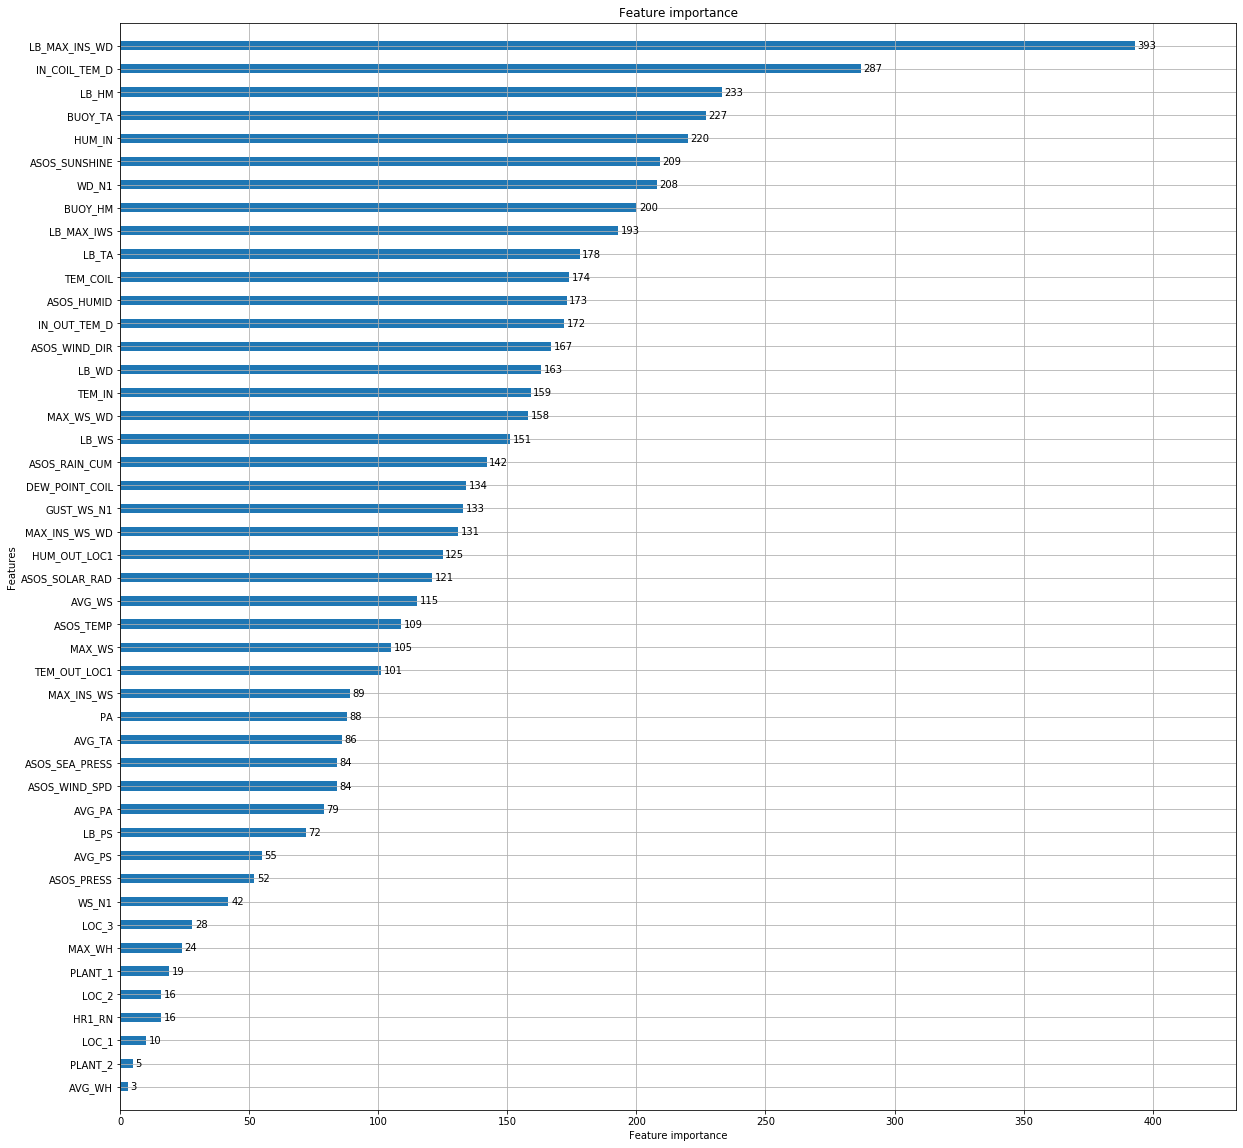

In [143]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_clf_over24, ax=ax,  max_num_features=50,height=0.4)

In [144]:
lgbm_model24_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_clf_over24.feature_importances_], columns=['variable', 'importance'])
lgbm_model24_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model24_df['variable'].tail(20)

10            MAX_WS
3       TEM_OUT_LOC1
12        MAX_INS_WS
17                PA
8             AVG_TA
35     ASOS_WIND_SPD
37    ASOS_SEA_PRESS
5             AVG_PA
27             LB_PS
6             AVG_PS
36        ASOS_PRESS
15             WS_N1
45             LOC_3
20            MAX_WH
41           PLANT_1
7             HR1_RN
44             LOC_2
43             LOC_1
42           PLANT_2
21            AVG_WH
Name: variable, dtype: object

### UnderSampling

In [145]:
from lightgbm import LGBMClassifier
lgbm_clf_under24 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under24.fit(X_undersampled24, y_undersampled24, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled24, y_undersampled24), (X_val, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_clf_under24.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's auc: 0.967449	training's binary_logloss: 0.625034	valid_1's auc: 0.949474	valid_1's binary_logloss: 0.628873
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.968879	training's binary_logloss: 0.569615	valid_1's auc: 0.951667	valid_1's binary_logloss: 0.575804
[3]	training's auc: 0.971737	training's binary_logloss: 0.522621	valid_1's auc: 0.95365	valid_1's binary_logloss: 0.532723
[4]	training's auc: 0.975004	training's binary_logloss: 0.482886	valid_1's auc: 0.958945	valid_1's binary_logloss: 0.494788
[5]	training's auc: 0.976009	training's binary_logloss: 0.448596	valid_1's auc: 0.960494	valid_1's binary_logloss: 0.463459
[6]	training's auc: 0.977053	training's binary_logloss: 0.419341	valid_1's auc: 0.962094	valid_1's binary_logloss: 0.437042
[7]	training's auc: 0.978045	training's binary_logloss: 0.392714	valid_1's auc: 0.963275	valid_1's binary_logloss: 0.412449
[8]	training's auc: 0.979655	training's binary_logloss: 0.369237	valid_

[83]	training's auc: 1	training's binary_logloss: 0.0179952	valid_1's auc: 0.990997	valid_1's binary_logloss: 0.130798
[84]	training's auc: 1	training's binary_logloss: 0.0173234	valid_1's auc: 0.991012	valid_1's binary_logloss: 0.130232
[85]	training's auc: 1	training's binary_logloss: 0.0167462	valid_1's auc: 0.991028	valid_1's binary_logloss: 0.130163
[86]	training's auc: 1	training's binary_logloss: 0.0161645	valid_1's auc: 0.991077	valid_1's binary_logloss: 0.129646
[87]	training's auc: 1	training's binary_logloss: 0.0156618	valid_1's auc: 0.991093	valid_1's binary_logloss: 0.129719
[88]	training's auc: 1	training's binary_logloss: 0.015093	valid_1's auc: 0.991099	valid_1's binary_logloss: 0.129713
[89]	training's auc: 1	training's binary_logloss: 0.0145445	valid_1's auc: 0.991149	valid_1's binary_logloss: 0.129242
[90]	training's auc: 1	training's binary_logloss: 0.0140203	valid_1's auc: 0.991158	valid_1's binary_logloss: 0.129029
[91]	training's auc: 1	training's binary_logloss:

[171]	training's auc: 1	training's binary_logloss: 0.000901091	valid_1's auc: 0.991923	valid_1's binary_logloss: 0.144369
[172]	training's auc: 1	training's binary_logloss: 0.000869933	valid_1's auc: 0.991928	valid_1's binary_logloss: 0.144623
[173]	training's auc: 1	training's binary_logloss: 0.000846795	valid_1's auc: 0.991913	valid_1's binary_logloss: 0.14511
[174]	training's auc: 1	training's binary_logloss: 0.000818864	valid_1's auc: 0.991894	valid_1's binary_logloss: 0.145279
[175]	training's auc: 1	training's binary_logloss: 0.000791308	valid_1's auc: 0.991888	valid_1's binary_logloss: 0.145519
[176]	training's auc: 1	training's binary_logloss: 0.000770515	valid_1's auc: 0.991891	valid_1's binary_logloss: 0.146003
[177]	training's auc: 1	training's binary_logloss: 0.000744872	valid_1's auc: 0.991912	valid_1's binary_logloss: 0.146666
[178]	training's auc: 1	training's binary_logloss: 0.000717444	valid_1's auc: 0.99192	valid_1's binary_logloss: 0.146712
[179]	training's auc: 1	tr

In [146]:
y_pred_under24 = lgbm_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98    104202
         1.0       0.10      0.97      0.19       594

    accuracy                           0.95    104796
   macro avg       0.55      0.96      0.58    104796
weighted avg       0.99      0.95      0.97    104796



### SMOTE

In [ ]:
from lightgbm import LGBMClassifier
lgbm_clf_smote24 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_smote24.fit(X_resampled24, y_resampled24, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_resampled24, y_resampled24), (X_val, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_clf_smote24.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's auc: 0.979756	training's binary_logloss: 0.611797	valid_1's auc: 0.966941	valid_1's binary_logloss: 0.61191
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.985253	training's binary_logloss: 0.544614	valid_1's auc: 0.974661	valid_1's binary_logloss: 0.544737
[3]	training's auc: 0.986843	training's binary_logloss: 0.487784	valid_1's auc: 0.978209	valid_1's binary_logloss: 0.488355
[4]	training's auc: 0.987722	training's binary_logloss: 0.439567	valid_1's auc: 0.979025	valid_1's binary_logloss: 0.440608
[5]	training's auc: 0.988999	training's binary_logloss: 0.397701	valid_1's auc: 0.981005	valid_1's binary_logloss: 0.399024
[6]	training's auc: 0.989681	training's binary_logloss: 0.361538	valid_1's auc: 0.981805	valid_1's binary_logloss: 0.363143
[7]	training's auc: 0.990264	training's binary_logloss: 0.329758	valid_1's auc: 0.98259	valid_1's binary_logloss: 0.33196
[8]	training's auc: 0.991534	training's binary_logloss: 0.301355	valid_1'

In [ ]:
y_pred_smote24 = lgbm_clf_smote24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_smote24))

## 48 시간 결로 예측

### OverSampling

In [ ]:
from lightgbm import LGBMClassifier
lgbm_clf_over48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_over48.fit(X_oversampled48, y_oversampled48, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_oversampled48, y_oversampled48), (X_val, y_val48)])

lgbm_roc_score = roc_auc_score(y_val48, lgbm_clf_over48.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
y_pred_over48 = lgbm_clf_over48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_over48))

### UnderSampling

In [ ]:
from lightgbm import LGBMClassifier
lgbm_clf_under48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under48.fit(X_undersampled48, y_undersampled48, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled48, y_undersampled48), (X_val, y_val48)])

lgbm_roc_score = roc_auc_score(y_val48, lgbm_clf_under48.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
y_pred_under48 = lgbm_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

### SMOTE

In [ ]:
from lightgbm import LGBMClassifier
lgbm_clf_smote48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_smote48.fit(X_resampled48, y_resampled48, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_resampled48, y_resampled48), (X_val, y_val48)])

lgbm_roc_score = roc_auc_score(y_val48, lgbm_clf_smote48.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
y_pred_smote48 = lgbm_clf_smote48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_smote48))

## 검증값 만들기

In [ ]:
lgValiation =etl.makeValiation(test_data,lgbm_clf_under24,lgbm_clf_under24, test_X)
lgValiation

In [ ]:
findCondRow24(validation)

In [ ]:
findCondRow48(lgValiation)

In [ ]:
etl.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24 시간 결로 예측

In [211]:
from xgboost import XGBClassifier
xgb_model24 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model24.fit(X_resampled24, y_resampled24,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-logloss:0.606597
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.536962
[2]	validation_0-logloss:0.476451
[3]	validation_0-logloss:0.425101
[4]	validation_0-logloss:0.381498
[5]	validation_0-logloss:0.343552
[6]	validation_0-logloss:0.310727
[7]	validation_0-logloss:0.283175
[8]	validation_0-logloss:0.258011
[9]	validation_0-logloss:0.234949
[10]	validation_0-logloss:0.214191
[11]	validation_0-logloss:0.195936
[12]	validation_0-logloss:0.178834
[13]	validation_0-logloss:0.163721
[14]	validation_0-logloss:0.150015
[15]	validation_0-logloss:0.138077
[16]	validation_0-logloss:0.127442
[17]	validation_0-logloss:0.117503
[18]	validation_0-logloss:0.109011
[19]	validation_0-logloss:0.100879
[20]	validation_0-logloss:0.093595
[21]	validation_0-logloss:0.086998
[22]	validation_0-logloss:0.081146
[23]	validation_0-logloss:0.075591
[24]	validation_0-logloss:0.070712
[25]	validation_0-logloss:0.06612
[26]	validation_0-logloss:0.0615

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [212]:
y_pred24 = xgb_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.81      0.89      0.85       594

    accuracy                           1.00    104796
   macro avg       0.91      0.95      0.92    104796
weighted avg       1.00      1.00      1.00    104796



## 48 시간 결로 예측

In [213]:
from xgboost import XGBClassifier
xgb_model48 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model48.fit(X_resampled48, y_resampled48,  early_stopping_rounds=100,eval_set=[(X_val, y_val48)], eval_metric="logloss",  verbose=True)

[0]	validation_0-logloss:0.610326
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.540852
[2]	validation_0-logloss:0.4845
[3]	validation_0-logloss:0.435351
[4]	validation_0-logloss:0.392431
[5]	validation_0-logloss:0.356449
[6]	validation_0-logloss:0.325631
[7]	validation_0-logloss:0.296049
[8]	validation_0-logloss:0.270975
[9]	validation_0-logloss:0.248602
[10]	validation_0-logloss:0.229267
[11]	validation_0-logloss:0.213413
[12]	validation_0-logloss:0.199212
[13]	validation_0-logloss:0.185765
[14]	validation_0-logloss:0.172282
[15]	validation_0-logloss:0.160614
[16]	validation_0-logloss:0.149595
[17]	validation_0-logloss:0.138598
[18]	validation_0-logloss:0.129086
[19]	validation_0-logloss:0.121114
[20]	validation_0-logloss:0.115103
[21]	validation_0-logloss:0.107907
[22]	validation_0-logloss:0.101413
[23]	validation_0-logloss:0.09529
[24]	validation_0-logloss:0.089127
[25]	validation_0-logloss:0.08355
[26]	validation_0-logloss:0.078761


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [214]:
y_pred48 = xgb_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.84      0.90      0.87       594

    accuracy                           1.00    104796
   macro avg       0.92      0.95      0.93    104796
weighted avg       1.00      1.00      1.00    104796



## 검증 값 만들기

In [215]:
xgValiation= etl.makeValiation(test_data, xgb_model24, xgb_model48, test_X)
xgValiation

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [216]:
findCondRow24(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1976,2019-11-16 14:00:00,1,2,2019-11-17 14:00:00,1,62,2019-11-18 14:00:00,0,2
1981,2019-11-16 22:00:00,1,3,2019-11-17 22:00:00,1,52,2019-11-18 22:00:00,0,21
1983,2019-11-16 22:30:00,1,3,2019-11-17 22:30:00,1,81,2019-11-18 22:30:00,0,14
1993,2019-11-17 00:00:00,1,3,2019-11-18 00:00:00,1,52,2019-11-19 00:00:00,0,21
2013,2019-11-17 03:00:00,1,3,2019-11-18 03:00:00,1,54,2019-11-19 03:00:00,0,22
...,...,...,...,...,...,...,...,...,...
3141,2020-02-19 17:30:00,2,1,2020-02-20 17:30:00,1,63,2020-02-21 17:30:00,0,15
3142,2020-02-19 19:00:00,1,1,2020-02-20 19:00:00,1,88,2020-02-21 19:00:00,0,16
3165,2020-02-21 01:30:00,1,2,2020-02-22 01:30:00,1,53,2020-02-23 01:30:00,0,35
3176,2020-02-21 11:30:00,1,3,2020-02-22 11:30:00,1,90,2020-02-23 11:30:00,1,93


In [217]:
findCondRow48(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1989,2019-11-16 23:30:00,1,3,2019-11-17 23:30:00,0,35,2019-11-18 23:30:00,1,59
2303,2019-12-15 09:30:00,1,2,2019-12-16 09:30:00,1,61,2019-12-17 09:30:00,1,52
2309,2019-12-15 10:00:00,1,3,2019-12-16 10:00:00,0,7,2019-12-17 10:00:00,1,66
2314,2019-12-15 10:30:00,1,3,2019-12-16 10:30:00,0,13,2019-12-17 10:30:00,1,66
2318,2019-12-15 11:00:00,1,3,2019-12-16 11:00:00,1,68,2019-12-17 11:00:00,1,59
2327,2019-12-15 12:00:00,1,3,2019-12-16 12:00:00,0,13,2019-12-17 12:00:00,1,50
2331,2019-12-15 12:30:00,1,3,2019-12-16 12:30:00,0,24,2019-12-17 12:30:00,1,61
2335,2019-12-15 13:00:00,1,3,2019-12-16 13:00:00,0,15,2019-12-17 13:00:00,1,58
2348,2019-12-16 10:00:00,1,1,2019-12-17 10:00:00,0,17,2019-12-18 10:00:00,1,64
2352,2019-12-16 10:00:00,1,3,2019-12-17 10:00:00,1,98,2019-12-18 10:00:00,1,55


In [218]:
etl.save_validation_csv(xgValiation,"xgboost")

# KNN
## 24시간 결로 예측

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
y_pred24 = neigh24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104055
         1.0       1.00      1.00      1.00    104266

    accuracy                           1.00    208321
   macro avg       1.00      1.00      1.00    208321
weighted avg       1.00      1.00      1.00    208321



## 48시간 결로 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train48, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
y_pred48 = neigh48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

In [ ]:
knnValiation=makeValiation(neigh24,neigh48)
knnValiation

In [ ]:
findCondRow24(knnValiation)

In [ ]:
findCondRow48(knnValiation)